**Вариант 2**

Система состоит из трёх подсистем. Для работы системы в целом необходимо, чтобы ра-
ботала хотя бы одна подсистема. Интенсивности отказа подсистем одинаковы и равны

λ = 2 ч
−1
. Восстановление отказавших подсистем производится одной ремонтной бригадой

по принципу обратного приоритета (сначала восстанавливают ту подсистему, что отказа-
ла последней). Среднее время восстановления одной подсистемы T = 0,5 ч. Определить

вероятности нахождения в каждом из состояний и коэффициент готовности в установив-
шемся режиме. А также, решив систему дифференциальных уравнений, найти данные

показатели как функции времени при условии, что в начальный момент времени система
находилась в состоянии 0.

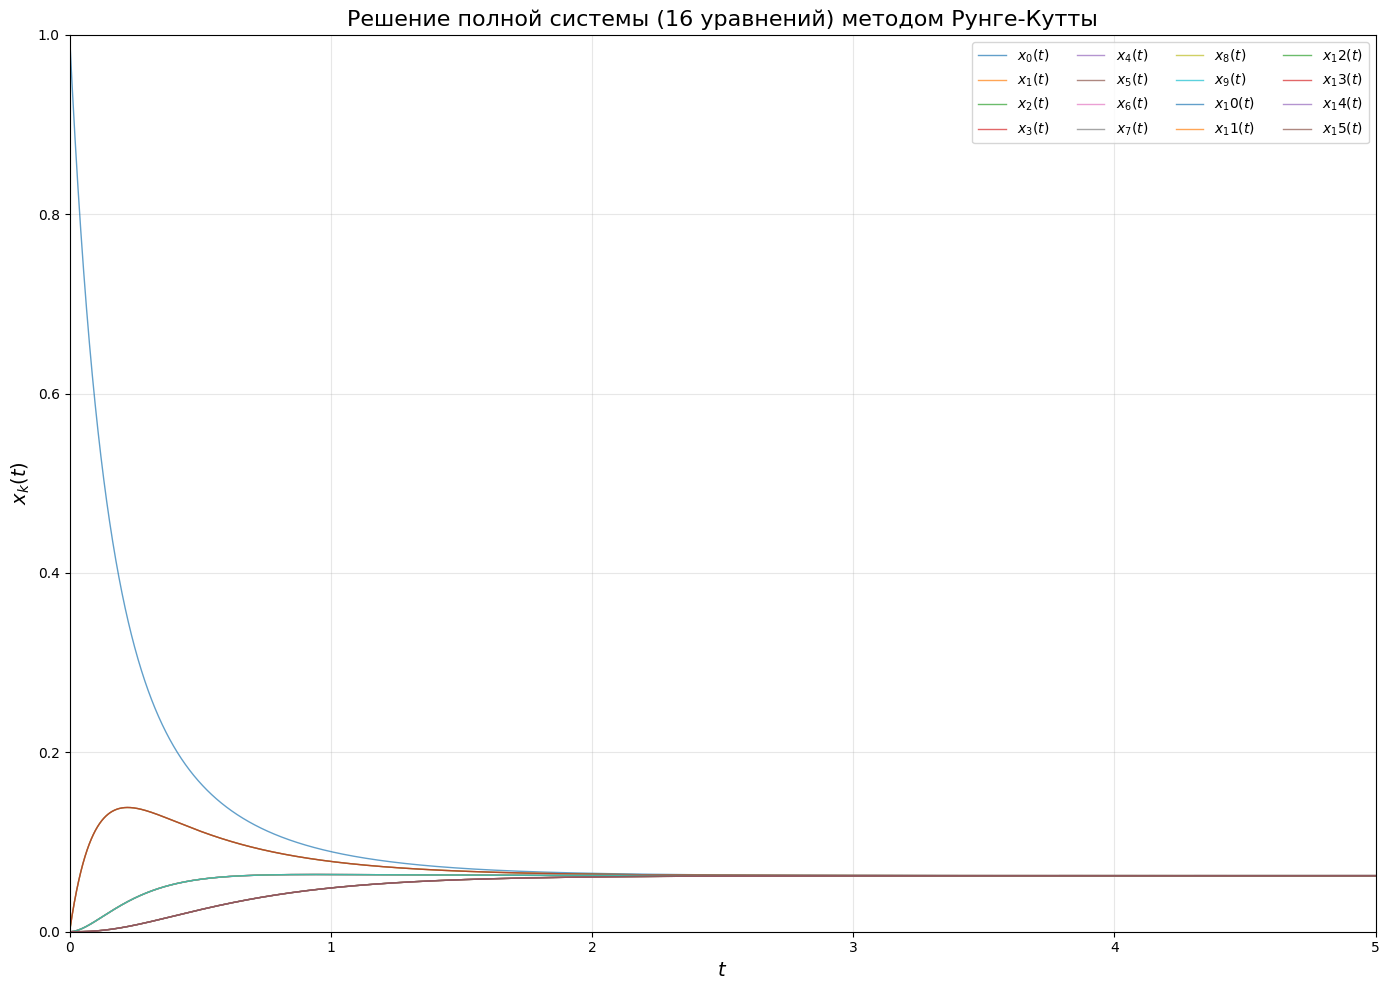

C:\Users\Qweyke\AppData\Local\Temp\ipykernel_18100\2076020738.py:174: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "m-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(time_points, P3_history, "m-", label="$P_3(t)$", linewidth=2, linestyle="--")


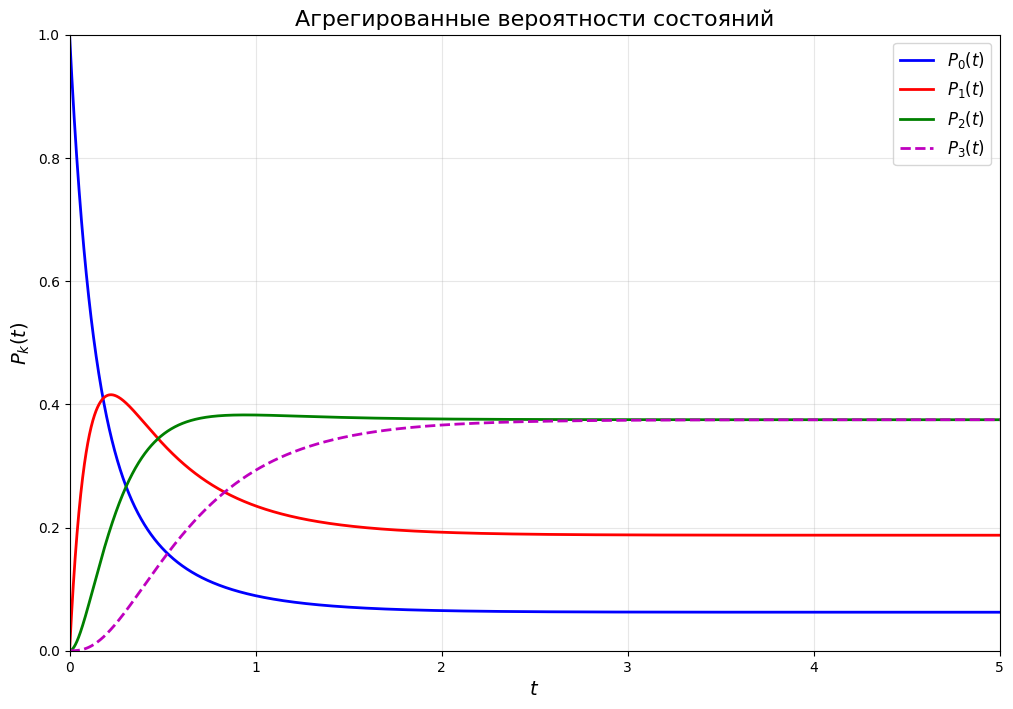

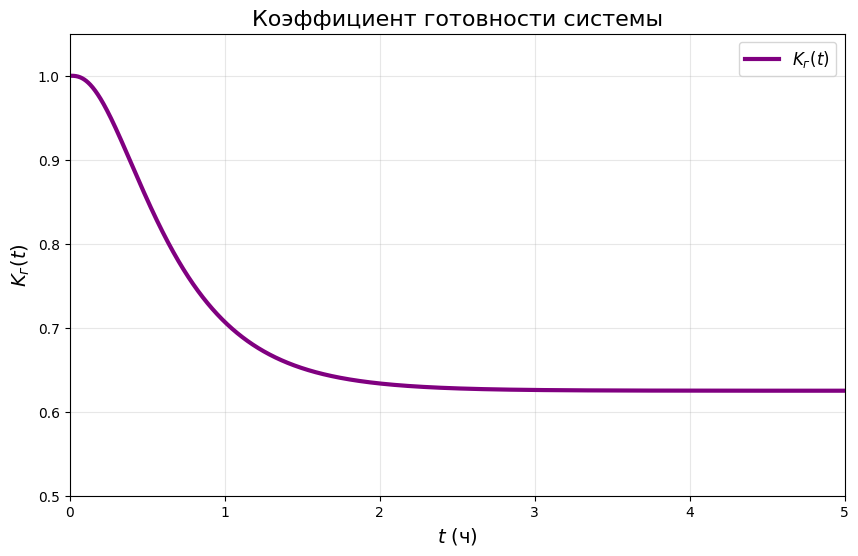

Время: 0.000 ч
Сумма всех вероятностей: 1.0000000000

Агрегированные вероятности:
  P₀ = 1.000000
  P₁ = 0.000000
  P₂ = 0.000000
  P₃ = 0.000000
  Kг = 1.000000
Время: 0.500 ч
Сумма всех вероятностей: 1.0000000000

Агрегированные вероятности:
  P₀ = 0.165917
  P₁ = 0.336415
  P₂ = 0.350477
  P₃ = 0.147191
  Kг = 0.852809
Время: 1.000 ч
Сумма всех вероятностей: 1.0000000000

Агрегированные вероятности:
  P₀ = 0.089337
  P₁ = 0.235127
  P₂ = 0.382647
  P₃ = 0.292889
  Kг = 0.707111
Время: 2.000 ч
Сумма всех вероятностей: 1.0000000000

Агрегированные вероятности:
  P₀ = 0.065110
  P₁ = 0.192347
  P₂ = 0.376188
  P₃ = 0.366356
  Kг = 0.633644
Время: 10.000 ч
Сумма всех вероятностей: 1.0000000000

Агрегированные вероятности:
  P₀ = 0.062500
  P₁ = 0.187500
  P₂ = 0.375000
  P₃ = 0.375000
  Kг = 0.625000

Проверка равномерности (все x_i должны быть ≈ 1/16 = 0.062500):
  Все x_i ≈ 1/16


In [ ]:
import numpy as np

# x0: (ABC|)
# x1: (AB|C), x2: (AC|B), x3: (BC|A)  - S₁
# x6: (A|BC), x4: (A|CB)              - когда работает A
# x8: (B|AC), x5: (B|CA)              - когда работает B
# x9: (C|AB), x7: (C|BA)              - когда работает C
# x15: (|ABC), x14: (|ACB)            - S₃
# x13: (|BAC), x12: (|BCA)
# x11: (|CAB), x10: (|CBA)

A = np.zeros((16, 16))

# Заполняем матрицу согласно уравнениям (λ=2, μ=2)

# Строка 0: dx₀/dt = 2(x₁ + x₂ + x₃) - 6x₀
A[0, 0] = -6
A[0, 1] = 2
A[0, 2] = 2
A[0, 3] = 2

# Строка 1: dx₁/dt = 2x₀ - 6x₁ + 2x₆ + 2x₄  (из (AB|C): отказы A,B → x₆,x₄)
A[1, 0] = 2
A[1, 1] = -6
A[1, 6] = 2  # отказ A → (A|BC) - это x₆
A[1, 4] = 2  # отказ B → (A|CB) - это x₄

# Строка 2: dx₂/dt = 2x₀ - 6x₂ + 2x₈ + 2x₉  (из (AC|B): отказы A,C → x₈,x₉)
A[2, 0] = 2
A[2, 2] = -6
A[2, 8] = 2  # отказ A → (B|AC) - это x₈
A[2, 9] = 2  # отказ C → (C|AB) - это x₉

# Строка 3: dx₃/dt = 2x₀ - 6x₃ + 2x₅ + 2x₇  (из (BC|A): отказы B,C → x₅,x₇)
A[3, 0] = 2
A[3, 3] = -6
A[3, 5] = 2  # отказ B → (B|CA) - это x₅
A[3, 7] = 2  # отказ C → (C|BA) - это x₇

# Строка 4: dx₄/dt = 2x₁ - 4x₄ + 2x₁₄  (из (A|CB): отказ A → x₁₄, восстановление C → x₁)
A[4, 1] = 2
A[4, 4] = -4
A[4, 14] = 2

# Строка 5: dx₅/dt = 2x₃ - 4x₅ + 2x₁₂  (из (B|CA): отказ B → x₁₂, восстановление C → x₃)
A[5, 3] = 2
A[5, 5] = -4
A[5, 12] = 2

# Строка 6: dx₆/dt = 2x₁ - 4x₆ + 2x₁₅  (из (A|BC): отказ A → x₁₅, восстановление B → x₁)
A[6, 1] = 2
A[6, 6] = -4
A[6, 15] = 2

# Строка 7: dx₇/dt = 2x₃ - 4x₇ + 2x₁₀  (из (C|BA): отказ C → x₁₀, восстановление B → x₃)
A[7, 3] = 2
A[7, 7] = -4
A[7, 10] = 2

# Строка 8: dx₈/dt = 2x₂ - 4x₈ + 2x₁₃  (из (B|AC): отказ B → x₁₃, восстановление A → x₂)
A[8, 2] = 2
A[8, 8] = -4
A[8, 13] = 2

# Строка 9: dx₉/dt = 2x₂ - 4x₉ + 2x₁₁  (из (C|AB): отказ C → x₁₁, восстановление A → x₂)
A[9, 2] = 2
A[9, 9] = -4
A[9, 11] = 2

# Строка 10: dx₁₀/dt = 2x₇ - 2x₁₀  (из (|CBA): восстановление C → x₇)
A[10, 7] = 2
A[10, 10] = -2

# Строка 11: dx₁₁/dt = 2x₉ - 2x₁₁  (из (|CAB): восстановление C → x₉)
A[11, 9] = 2
A[11, 11] = -2

# Строка 12: dx₁₂/dt = 2x₅ - 2x₁₂  (из (|BCA): восстановление B → x₅)
A[12, 5] = 2
A[12, 12] = -2

# Строка 13: dx₁₃/dt = 2x₈ - 2x₁₃  (из (|BAC): восстановление B → x₈)
A[13, 8] = 2
A[13, 13] = -2

# Строка 14: dx₁₄/dt = 2x₄ - 2x₁₄  (из (|ACB): восстановление A → x₄)
A[14, 4] = 2
A[14, 14] = -2

# Строка 15: dx₁₅/dt = 2x₆ - 2x₁₅  (из (|ABC): восстановление A → x₆)
A[15, 6] = 2
A[15, 15] = -2


# Функция правой части системы: dx/dt = A @ x
def f(x):
    return A @ x 


# Параметры метода
h = 0.001  # шаг времени
T = 10.0  # конечное время
steps = int(T / h)

# Начальные условия: x₀(0)=1, остальные 0
x = np.zeros(16)
x[0] = 1.0  # x₀(0)=1

# Массивы для хранения результатов
time_points = np.linspace(0, T, steps + 1)
x_history = np.zeros((steps + 1, 16))
x_history[0] = x

# Метод Рунге-Кутты 4-го порядка
for i in range(steps):
    k1 = f(x)
    k2 = f(x + 0.5 * h * k1)
    k3 = f(x + 0.5 * h * k2)
    k4 = f(x + h * k3)

    x = x + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    x_history[i + 1] = x

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
for k in range(16):
    plt.plot(time_points, x_history[:, k], label=f"$x_{k}(t)$", linewidth=1, alpha=0.7)

plt.xlabel("$t$", fontsize=14)
plt.ylabel("$x_k(t)$", fontsize=14)
plt.title("Решение полной системы (16 уравнений) методом Рунге-Кутты", fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, ncol=4)
plt.xlim(0, 5)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

P0_history = x_history[:, 0]
P1_history = x_history[:, 1] + x_history[:, 2] + x_history[:, 3]
P2_history = (
    x_history[:, 4]
    + x_history[:, 5]
    + x_history[:, 6]
    + x_history[:, 7]
    + x_history[:, 8]
    + x_history[:, 9]
)
P3_history = (
    x_history[:, 10]
    + x_history[:, 11]
    + x_history[:, 12]
    + x_history[:, 13]
    + x_history[:, 14]
    + x_history[:, 15]
)
K_history = P0_history + P1_history + P2_history

# 3. График агрегированных вероятностей
plt.figure(figsize=(12, 8))
plt.plot(time_points, P0_history, "b-", label="$P_0(t)$", linewidth=2)
plt.plot(time_points, P1_history, "r-", label="$P_1(t)$", linewidth=2)
plt.plot(time_points, P2_history, "g-", label="$P_2(t)$", linewidth=2)
plt.plot(time_points, P3_history, "m-", label="$P_3(t)$", linewidth=2, linestyle="--")

plt.xlabel("$t$", fontsize=14)
plt.ylabel("$P_k(t)$", fontsize=14)
plt.title("Агрегированные вероятности состояний", fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0, 5)
plt.ylim(0, 1)
plt.show()

# 4. График коэффициента готовности
plt.figure(figsize=(10, 6))
plt.plot(time_points, K_history, "purple", linewidth=3, label="$K_г(t)$")
plt.xlabel("$t$ (ч)", fontsize=14)
plt.ylabel("$K_г(t)$", fontsize=14)
plt.title("Коэффициент готовности системы", fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(0, 5)
plt.ylim(0.5, 1.05)
plt.show()


def get_snapshot(t_target):
    """Возвращает значения в момент t_target"""
    index = np.argmin(np.abs(time_points - t_target))

    # Агрегированные вероятности
    P0 = x_history[index, 0]
    P1 = x_history[index, 1] + x_history[index, 2] + x_history[index, 3]
    P2 = (
        x_history[index, 4]
        + x_history[index, 5]
        + x_history[index, 6]
        + x_history[index, 7]
        + x_history[index, 8]
        + x_history[index, 9]
    )
    P3 = (
        x_history[index, 10]
        + x_history[index, 11]
        + x_history[index, 12]
        + x_history[index, 13]
        + x_history[index, 14]
        + x_history[index, 15]
    )
    K = P0 + P1 + P2

    print("=" * 60)
    print(f"Время: {time_points[index]:.3f} ч")
    print(f"Сумма всех вероятностей: {np.sum(x_history[index]):.10f}")
    print(f"\nАгрегированные вероятности:")
    print(f"  P₀ = {P0:.6f}")
    print(f"  P₁ = {P1:.6f}")
    print(f"  P₂ = {P2:.6f}")
    print(f"  P₃ = {P3:.6f}")
    print(f"  Kг = {K:.6f}")

    if t_target >= 5:  # для стационара
        print(f"\nПроверка равномерности (все x_i должны быть ≈ 1/16 = {1/16:.6f}):")
        all_equal = True
        for i in range(16):
            diff = abs(x_history[index, i] - 1 / 16)
            if diff > 0.001:
                all_equal = False
                print(
                    f"  x_{i} = {x_history[index, i]:.6f} (отличие от 1/16: {diff:.6f})"
                )
        if all_equal:
            print(f"  Все x_i ≈ 1/16")


get_snapshot(0)
get_snapshot(0.5)
get_snapshot(1.0)
get_snapshot(2.0)
get_snapshot(10.0)